# Projeto Grupo 6

### Requirements setup

In [2]:
%pip install pandas
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
%pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------------- ------------------------- 3.9/11.1 MB 25.0 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 32.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ------ --------------------------------- 6.6/41.0 MB 60.9 MB/s eta 0:00:01
   --------------------- ------------------ 22.0/41.0 MB 51.8 MB/s eta 0:00:01
   ------------------------------------- -- 38.5/41.0 MB 60.2 MB/s eta 0:00:01
   ---------------------------------------  40.9/41.0 MB 60.3 MB/s eta 0:00:01
   ---------------------------------------- 41.0/41.0 MB 43.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset into a pandas DataFrame.

In [4]:
df = pd.read_csv('netflix.csv', sep=',', index_col=0)
#Using index_col=0 parameter ensures pandas will use the first CSV column as the DF's index, this avoids duplicate indexes

In [5]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
index,,,,,,,,,,
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


# Show basic information about the DataFrame (data types).

In [6]:
df.dtypes

id                    object
title                 object
type                  object
description           object
release_year           int64
age_certification     object
runtime                int64
imdb_id               object
imdb_score           float64
imdb_votes           float64
dtype: object

# Show basic information about the DataFrame (Index dtype; columns; non-null Values & Memory Usage).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5283 entries, 0 to 5282
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5283 non-null   object 
 1   title              5283 non-null   object 
 2   type               5283 non-null   object 
 3   description        5278 non-null   object 
 4   release_year       5283 non-null   int64  
 5   age_certification  2998 non-null   object 
 6   runtime            5283 non-null   int64  
 7   imdb_id            5283 non-null   object 
 8   imdb_score         5283 non-null   float64
 9   imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 454.0+ KB


# Results above show that columns 4, 6 and 10 have missing values

### Calculate and display summary statistics for numerical columns.

In [8]:
df.describe()

,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2015.879992,79.199886,6.533447,2.340719e+04
std,7.346098,38.915974,1.160932,8.713432e+04
min,1953.000000,0.000000,1.500000,5.000000e+00
25%,2015.000000,45.000000,5.800000,5.210000e+02
50%,2018.000000,87.000000,6.600000,2.279000e+03
75%,2020.000000,106.000000,7.400000,1.014400e+04
max,2022.000000,235.000000,9.600000,2.268288e+06


# Data cleaning and preparation
### Check for missing values and handle them appropriately (e.g., drop or fill).

In [9]:
# Creating new df (df_fix) and assigning value of original df, minus detected null rows in column 4 (description)
df_fix = df.dropna(subset=['description'])


In [10]:
#Slicing and returning entries 30 to 40 (41 not inclusive)
df_fix.iloc[30:41]

,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
index,,,,,,,,,,
30,tm75975,Prince,MOVIE,"To better himself, a spoiled prince temporaril...",1969,NaN,152,tt0064842,6.9,168.0
31,tm107372,Manoranjan,MOVIE,Havaldar Ratan is a rookie at the local police...,1974,NaN,162,tt0071811,6.5,236.0
32,tm200475,"Beirut, Oh Beirut",MOVIE,"In the aftermath of the 1967 defeat, four youn...",1975,NaN,110,tt0169599,6.5,106.0
33,tm259855,We Are All for the Fatherland,MOVIE,"After the 1978 Israeli invasion of Lebanon, ch...",1979,NaN,74,tt0170799,6.2,43.0
34,tm259684,Whispers,MOVIE,"At every station, between sites filled with po...",1980,NaN,93,tt0170803,7.8,75.0
35,tm344089,Lal Patthar,MOVIE,Raja Kumar Bahadur alias Gyan Shankar Rai has ...,1971,NaN,153,tt0237395,6.2,137.0
36,tm358653,Ujala,MOVIE,An honest man dreams of a better life for his ...,1959,NaN,142,tt0157132,6.7,78.0
37,tm100027,Alibaba Aur 40 Chor,MOVIE,The movie is based on the story of Ali Baba an...,1979,NaN,138,tt0079749,6.2,555.0
38,tm10204,Professor,MOVIE,Sita devi is a very strict aunt for a number o...,1962,NaN,163,tt0056379,6.8,285.0


In [11]:
#Handling missing data in column 'age_certification'
#Considered attributing the placeholder string "Unrated" to rows missing data instead of dropping the column entirely but opted for the latter

df_fix = df_fix.drop(columns=['age_certification'])

In [12]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5278 entries, 0 to 5282
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5278 non-null   object 
 1   title         5278 non-null   object 
 2   type          5278 non-null   object 
 3   description   5278 non-null   object 
 4   release_year  5278 non-null   int64  
 5   runtime       5278 non-null   int64  
 6   imdb_id       5278 non-null   object 
 7   imdb_score    5278 non-null   float64
 8   imdb_votes    5263 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 412.3+ KB


In [13]:
# Replacing missing values in the imdb_votes column with a numeric placeholder (mean)

df_fix['imdb_votes'].fillna((df_fix['imdb_votes'].mean()),inplace=True)

C:\Users\vindi\AppData\Local\Temp\ipykernel_30728\202374481.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fix['imdb_votes'].fillna((df_fix['imdb_votes'].mean()),inplace=True)


### Create a new column 'decade' based on the 'release_year' (e.g., 2010s, 2020s).

In [14]:
df_fix['decade'] = (df_fix['release_year'] // 10) * 10

#decade calculation formula example
#decade = ( 2015//10​ ) × 10 = 2010
# / -> True division, always returns a floating-point result
# // -> Floor division, drops any fractional part of the returned number

In [15]:
df_fix.head(40)

,id,title,type,description,release_year,runtime,imdb_id,imdb_score,imdb_votes,decade
index,,,,,,,,,,
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,113,tt0075314,8.3,795222.0,1970
1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,tt0071853,8.2,530877.0,1970
2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,94,tt0079470,8.0,392419.0,1970
3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,133,tt0070047,8.1,391942.0,1970
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,30,tt0063929,8.8,72895.0,1960
5,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,102,tt0066999,7.7,153463.0,1970
6,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,170,tt0058385,7.8,94121.0,1960
7,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,104,tt0080453,5.8,69053.0,1980
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,110,tt0061418,7.7,111189.0,1960


### Calculate the average IMDB score for movies and TV shows separately.

In [16]:
movieMean = df_fix[df_fix["type"] == "MOVIE"]["imdb_score"].mean() 
#creating new DF that only contains rows where the type is "MOVIE"and selecting "imdb_score" column to obtain a Panda Series with "MOVIE" scores exclusively
showMean  = df_fix[df_fix["type"] == "SHOW"]["imdb_score"].mean()
#creating new DF that only contains rows where the type is "SHOW"and selecting "imdb_score" column to obtain a Panda Series with "SHOW" scores exclusively

print("Average IMDB score for movies: ",movieMean)
print("Average IMDB score for shows: ",showMean)

Average IMDB score for movies:  6.2677931237143705
Average IMDB score for shows:  7.017813333333333


### Find the top 10 highest-rated titles (based on IMDB score) for both movies and TV shows.

In [17]:
top10Mov = df_fix[df_fix["type"] == "MOVIE"].sort_values(by="imdb_score", ascending=False).head(10)
#Filtering DF to only include "MOVIE" type rows, and sorting filtered DF in descending order based on "imdb_score" 
top10Show = df_fix[df_fix["type"] == "SHOW"].sort_values(by="imdb_score", ascending=False).head(10)
##Filtering DF to only include "SHOW" type rows, and sorting filtered DF in descending order based on "imdb_score" 

#printing out only the "title" and "imdb_score" columns for clarity, better then print("Top10", top10Mov)
print("Top 10 Highest-Rated Movies:")
print(top10Mov[["title", "imdb_score"]])
#printing out only the "title" and "imdb_score" columns for clarity, better then print("Top10", top10Show)
print("\nTop 10 Highest-Rated Shows:")
print(top10Show[["title", "imdb_score"]])

Top 10 Highest-Rated Movies:
                                          title  imdb_score
index                                                      
24                               No Longer Kids         9.0
2685                          C/o Kancharapalem         9.0
3172   David Attenborough: A Life on Our Planet         9.0
822        Chhota Bheem & Krishna in Mayanagari         9.0
101                                Forrest Gump         8.8
4143                        Sky Tour: The Movie         8.8
246                                   Inception         8.8
3959                              Rubaru Roshni         8.7
495                         A Lion in the House         8.7
566                                  Anbe Sivam         8.7

Top 10 Highest-Rated Shows:
                            title  imdb_score
index                                        
2787                     #ABtalks         9.6
622                      Khawatir         9.6
229                  Breaking Bad     

### Calculate the average runtime for movies and TV shows.

In [18]:
movies_avgRun = df_fix[df_fix["type"] == "MOVIE"]["runtime"].mean()
shows_avgRun =  df_fix[df_fix["type"] == "SHOW"] ["runtime"].mean()

print("Average runtime for Movies: ", movies_avgRun)
print("Average runtime for Shows: ", shows_avgRun)

Average runtime for Movies:  101.56979136056421
Average runtime for Shows:  38.6288


### Determine the distribution of content across different age certifications.

In [19]:
ageDist = df["age_certification"].value_counts(dropna=False) 
## We are using the original df, and not df_fix, because we previously opted to drop the age_certification column since there are 2000+ NaN rows
print(ageDist)

age_certification
NaN      2285
TV-MA     792
R         548
TV-14     436
PG-13     424
PG        238
TV-PG     172
G         105
TV-Y7     104
TV-Y       94
TV-G       72
NC-17      13
Name: count, dtype: int64


# Data Manipulation
### Group the data by 'type' and 'age_certification', then calculate the average IMDB score for each group.

In [20]:
dataGroup = df.groupby(["type", "age_certification"])["imdb_score"].mean()
print(dataGroup)

type   age_certification
MOVIE  G                    6.393333
       NC-17                6.400000
       PG                   6.208403
       PG-13                6.444575
       R                    6.321168
SHOW   TV-14                7.262615
       TV-G                 6.348611
       TV-MA                7.065909
       TV-PG                6.916860
       TV-Y                 6.547872
       TV-Y7                6.913462
Name: imdb_score, dtype: float64


### Create a new DataFrame containing only the titles released in the last 5 years.

In [21]:
import datetime
# A date in Python is not a data type of its own, but we can import a module named datetime to work with dates as date objects.

yearNow = datetime.datetime.now().year
# Establishes the current year and stores it's value as an integer
last5_df = df_fix[df_fix['release_year'] >= yearNow - 5]
# Creates a new DF that only shows releases in the last 5 years

print(last5_df)

              id                               title   type  \
index                                                         
3010    ts216679                          Bridgerton   SHOW   
3017    tm681578                          The Rental  MOVIE   
3019     ts87453                         Space Force   SHOW   
3021    tm832345                            365 Days  MOVIE   
3022     ts89259                  The Queen's Gambit   SHOW   
...          ...                                 ...    ...   
5278   tm1040816         Momshies! Your Soul is Mine  MOVIE   
5279   tm1014599                           Fine Wine  MOVIE   
5280   tm1045018                               Clash  MOVIE   
5281   tm1098060                      Shadow Parties  MOVIE   
5282    ts271048  Mighty Little Bheem: Kite Festival   SHOW   

                                             description  release_year  \
index                                                                    
3010   Wealth, lust, and betraya

# Data filtering and sorting

### Filter the DataFrame to show only titles with an IMDB score above 8.0 and more than 10 000 votes.

In [22]:
filt_df = df_fix[(df_fix['imdb_score'] > 8.0) & (df_fix['imdb_votes'] > 10000)]
#Creation of 2 boolean series (mascaras booleanas), Nº1 is TRUE for "IMDB_score" above 8.0 AND (&) Nº2 is TRUE for "IMDB_votes" above 10k Votes
print(filt_df)

              id                            title   type  \
index                                                      
0        tm84618                      Taxi Driver  MOVIE   
1       tm127384  Monty Python and the Holy Grail  MOVIE   
3       tm190788                     The Exorcist  MOVIE   
4        ts22164     Monty Python's Flying Circus   SHOW   
43       ts20681                         Seinfeld   SHOW   
...          ...                              ...    ...   
4522   tm1038686               Bo Burnham: Inside  MOVIE   
4523    ts287976                     Young Royals   SHOW   
4580    ts271867                         Vincenzo   SHOW   
4647   tm1018890                       Seaspiracy  MOVIE   
4733   tm1086874                    Minnal Murali  MOVIE   

                                             description  release_year  \
index                                                                    
0      A mentally unstable Vietnam War veteran works ...          1976 

### Sort this filtered DataFrame by IMDB score in descending order.

In [23]:
scoreSort_df = filt_df.sort_values(by='imdb_score', ascending=False)

print("Top 10 Titles with at least 8.0 IMDB score and 10 000 votes:")
#Printing only the 3 relevant columns for clarity
print(scoreSort_df[["title", "imdb_score", "imdb_votes"]])



Top 10 Titles with at least 8.0 IMDB score and 10 000 votes:
                                 title  imdb_score  imdb_votes
index                                                         
229                       Breaking Bad         9.5   1727694.0
245         Avatar: The Last Airbender         9.3    297336.0
3597                      Kota Factory         9.3     66985.0
3144                        Our Planet         9.3     41386.0
3026                    The Last Dance         9.1    108321.0
...                                ...         ...         ...
3250                             Klaus         8.1    141480.0
3280            Bill Burr: Paper Tiger         8.1     10649.0
3359   The Trials of Gabriel Fernandez         8.1     10982.0
4647                        Seaspiracy         8.1     29604.0
4733                     Minnal Murali         8.1     24681.0

[180 rows x 3 columns]


# Indexing and selection
### Set the 'title' column as the index of the DataFrame.

In [24]:
df_fix.set_index("title", inplace=True)
#inplace=true modifies the DF directly, as opposed to using -> df_fix = df_fix.set_index('title')


In [25]:
df_fix.head()

,id,type,description,release_year,runtime,imdb_id,imdb_score,imdb_votes,decade
title,,,,,,,,,
Taxi Driver,tm84618,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,113,tt0075314,8.3,795222.0,1970
Monty Python and the Holy Grail,tm127384,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,tt0071853,8.2,530877.0,1970
Life of Brian,tm70993,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,94,tt0079470,8.0,392419.0,1970
The Exorcist,tm190788,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,133,tt0070047,8.1,391942.0,1970
Monty Python's Flying Circus,ts22164,SHOW,A British sketch comedy series with the shows ...,1969,30,tt0063929,8.8,72895.0,1960


### Select all movies released after 2020 using boolean indexing.

In [26]:
recentMovies = df_fix[(df_fix["release_year"] > 2020) & (df_fix["type"] == "MOVIE")]
#Creation of 2 boolean series (Mascaras booleanas), Nº1 is TRUE for "release_year" post 2020 (&) Nº2 is TRUE for "type" == "Movie"

print(recentMovies[["release_year",]])

                             release_year
title                                    
The Adam Project                     2022
Operation Mincemeat                  2022
The Power of the Dog                 2021
Choose or Die                        2022
Metal Lords                          2022
...                                   ...
Time to Dance                        2021
Momshies! Your Soul is Mine          2021
Fine Wine                            2021
Clash                                2021
Shadow Parties                       2021

[501 rows x 1 columns]


### Use loc to select specific columns for TV shows with runtime greater than 30 minutes.

In [27]:
tv30 = df_fix.loc[(df_fix["type"] == "SHOW") & (df_fix["runtime"] > 30),["runtime"]]
#Boolean series (mascaras booleanas) for rows = tv shows & tuntime 30+
#loc -> list of columns required
print(tv30)

                                  runtime
title                                    
Monty Python's Fliegender Zirkus       43
Knight Rider                           51
High Risk                              50
Survivor                               48
Stargate SG-1                          44
...                                   ...
The Five Juanas                        34
Christmas Flow                         50
Korean Cold Noodle Rhapsody            49
Pitta Kathalu                          37
The Big Day                            45

[1128 rows x 1 columns]


# Data Visualization (using matplotlib)
### Create a bar plot showing the average IMDB score by age certification.

Text(0.5, 1.0, 'Average IMDB Score by Age Certification')

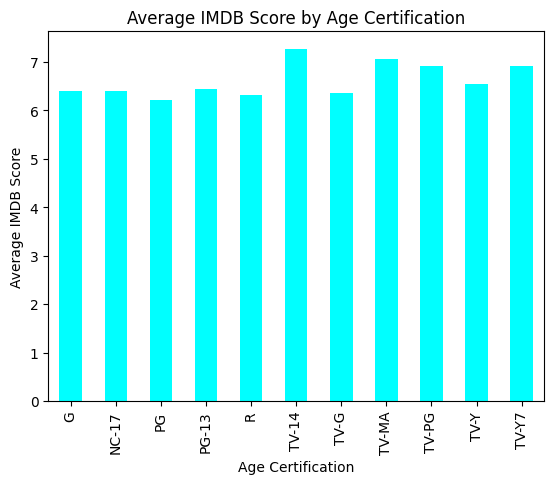

In [28]:
avgCert = df.groupby("age_certification")["imdb_score"].mean()
# Group by 'age_certification' and calculate the average IMDB score
# Using df instead of df.fix due to dropped "age_certification" column

avgCert.plot(kind="bar", color="cyan")
# Bar plot generation

plt.xlabel("Age Certification")
plt.ylabel("Average IMDB Score")
# x and y axis labels

plt.title("Average IMDB Score by Age Certification")
# Title label

### Generate a scatter plot of IMDB score vs. number of votes, with different colors for movies and TV shows.

Text(0.5, 1.0, 'IMDB Score vs. Number of Votes')

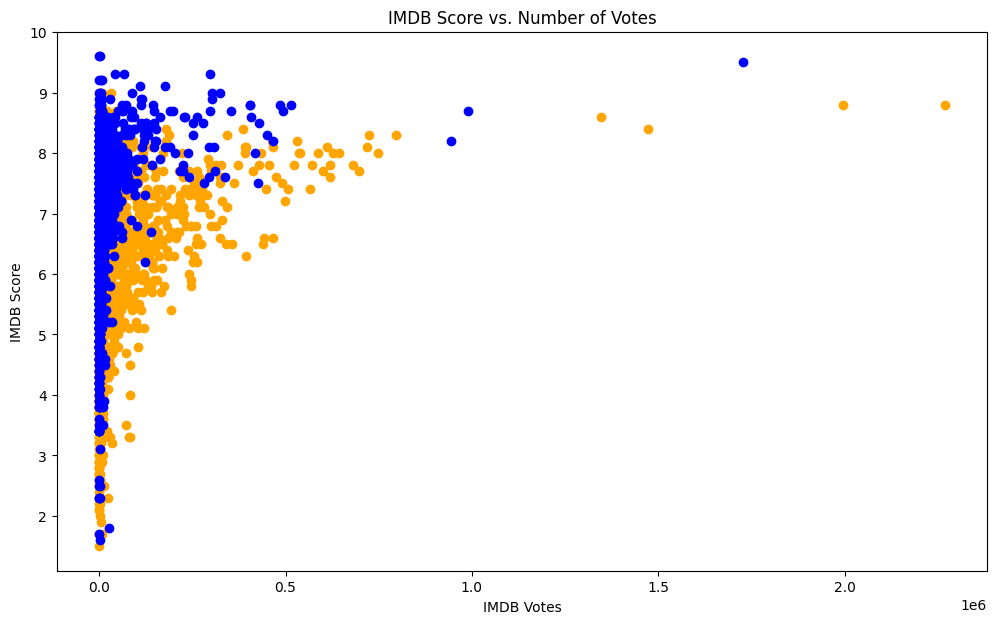

In [29]:

movies = df_fix[df_fix['type'] == 'MOVIE']
shows = df_fix[df_fix['type'] == 'SHOW']
# Filter DF by type

plt.figure(figsize=(12, 7)) # Customize graph dimensions
plt.scatter(movies['imdb_votes'], movies['imdb_score'], color='orange')
plt.scatter(shows['imdb_votes'], shows['imdb_score'], color='blue')
# Generate scatter plot, votes on X axis and imdb score on y axis. Movies = Orange & Shows = blue

plt.xlabel('IMDB Votes')
plt.ylabel('IMDB Score')
# Label axis

plt.title('IMDB Score vs. Number of Votes')
#title generation



### Plot a histogram of runtimes for movies.

Text(0.5, 1.0, 'Distribution of Movie Runtimes')

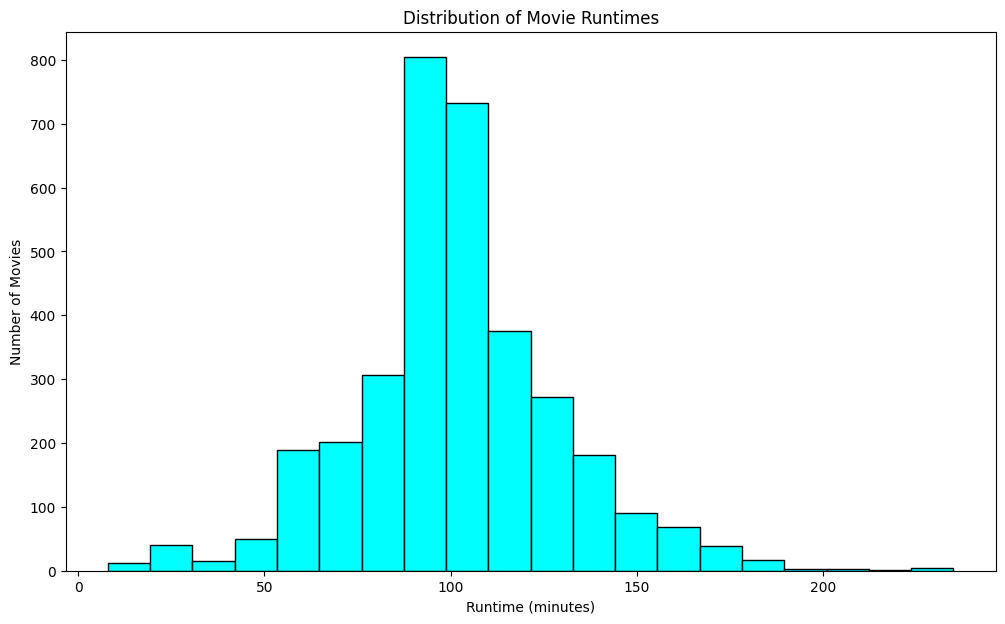

In [30]:
movies = df_fix[df_fix['type'] == 'MOVIE']
# Filter DF for movies exclusively

plt.figure(figsize=(12, 7)) # Customize graph dimensions
plt.hist(movies['runtime'], bins=20, color='cyan', edgecolor='black' )
#Histogram generation for the movies runtime column; bins = intervals where continous data is divided, in this case there are 20


plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Runtimes')
# Labels and title generation



# Data Export
### Export your final, cleaned, and analyzed DataFrame to both CSV and Excel formats.

In [31]:

df_fix.to_csv("Group6_DF.csv")
# Export final DF to CSV format

df_fix.to_excel("Group6_DF.xlsx")
#Export final DF to Excel format

# Bonus 1
### Decade-by-decade comparison of how many movies and how many TV shows were launched.

release_year
2019    749
2018    733
2021    687
2020    657
2017    555
       ... 
1961      1
1968      1
1977      1
1963      1
1960      1
Name: count, Length: 66, dtype: int64
<class 'pandas.core.series.Series'>


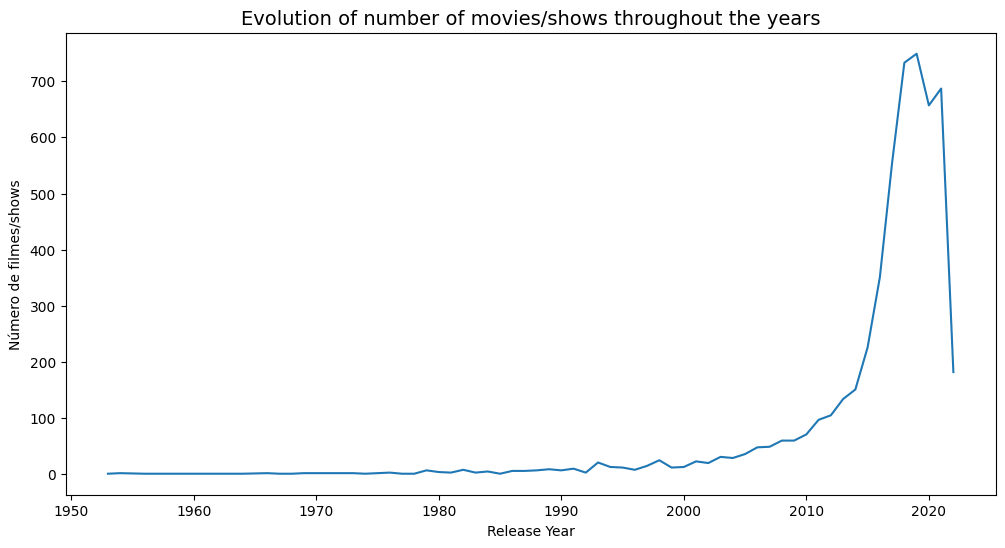

In [33]:
df_evolucao = df["release_year"].value_counts().sort_index() #index = release year / Value = count, sorted

print(df["release_year"].value_counts()) # Returns a series with the number of titles per year
print(type(df["release_year"].value_counts())) #Confirmation that the data type is a series

# Inserting a line chart
plt.figure(figsize=(12, 6)) #increased line chart size
plt.plot(df_evolucao.index, df_evolucao.values)

plt.title("Evolution of number of movies/shows throughout the years", fontsize=14) #Increased Title Font Size
plt.xlabel("Release Year")
plt.ylabel("Número de filmes/shows")

plt.show()

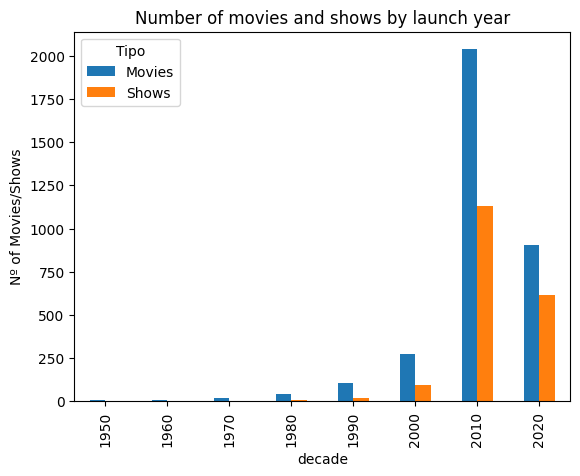

In [37]:
# Counts the movies/shows by launch decade
tipos_decadas = df_fix.groupby(['decade', 'type']).size().unstack(fill_value=0) #.unstack(fill_value=0) Used to join the bars in pairs

tipos_decadas.plot(kind='bar')

plt.title('Number of movies and shows by launch year')
plt.xlabel('decade')
plt.ylabel('Nº of Movies/Shows')
plt.legend(title='Tipo', labels=['Movies', 'Shows'])
plt.show()

# Bonus 2
### Machine Learning

In [59]:
# Create variable 'high_rating'
df['high_rating'] = (df['imdb_score'] > 7.5).astype(int) # without  .astype(int) it would return True ou False

# Checked
print(df[['imdb_score', 'high_rating']].head(15))

       imdb_score  high_rating
index                         
0             8.3            1
1             8.2            1
2             8.0            1
3             8.1            1
4             8.8            1
5             7.7            1
6             7.8            1
7             5.8            0
8             7.7            1
9             7.3            0
10            7.5            0
11            7.6            1
12            8.1            1
13            6.9            0
14            7.5            0


In [60]:
from sklearn.model_selection import train_test_split

X = df[['runtime', 'release_year']]
y = df['high_rating']

# Dividir os dados em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42) 

In [64]:
# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

In [65]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [66]:
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       864
           1       0.33      0.02      0.03       193

    accuracy                           0.81      1057
   macro avg       0.58      0.50      0.46      1057
weighted avg       0.73      0.81      0.74      1057



In [67]:
len(df['high_rating'])

up=0
down=0
for i in df["high_rating"]:
    # Counting 0's and 1's to check the balancing of the data
    if i == 1:
        up+=1
    else:
        down+=1
print(up)   
print(down)
print(up+down)

990
4293
5283


The fact that the dataset is not balanced biases the training (there are many more 0 than 1)

Too few input parameters to adequately estimate y; increasing this number could improve the result. We could have more variables, like actors, directors, etc.